In [1]:
import fundamentalanalysis as fa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import statistics as st
from matplotlib.pyplot import figure

%matplotlib inline  

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
api_key = '00ef9804fcde0edd93b1b4821ee2f06a'
# api_key = 'c81352430e2fe3c941faf0814227562b'

In [4]:

''' Колонки '''
ticker = 'F'
# ticker = 'AAPL'



''' для фильтрации'''
filt_start_date = '1999'
filt_finish_date = '2022'


''' время '''
stime=f'{str(int(filt_start_date)-1)}-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'



In [5]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = get_data_from_ticker(ticker, stime, None, period)
df_market = get_data_from_ticker('^GSPC', stime, None, period)
df.tail(3)

,F
Date,
2022-12-01 00:00:00-05:00,11.63
2023-01-01 00:00:00-05:00,13.51
2023-02-01 00:00:00-05:00,13.79


In [6]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df_market  = change_index(df_market)
df.head(3)

,F
Date_index,
1998-01-01,8.822250
1998-02-01,9.867585
1998-03-01,11.306827


In [7]:
df_inc_stat = fa.income_statement(ticker, api_key)
df_inc_stat = df_inc_stat.T
df_inc_stat.head(3)

,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,operatingExpenses,costAndExpenses,interestIncome,interestExpense,depreciationAndAmortization,ebitda,ebitdaratio,operatingIncome,operatingIncomeRatio,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
2021,USD,0000037996,2022-02-04,2022-02-03 18:24:07,2021,FY,136341000000,114651000000,21690000000,0.159086,0,0,0,11915000000,0,11915000000,126566000000,261000000,7055000000,5960000000,30822000000,0.226066,4523000000,0.033174,13257000000,17780000000,0.130408,-130000000,17937000000,0.13156,4.49,4.45,3991000000,4034000000,https://www.sec.gov/Archives/edgar/data/37996/...,https://www.sec.gov/Archives/edgar/data/37996/...
2020,USD,0000037996,2021-02-05,2021-02-04 18:58:09,2020,FY,127144000000,112752000000,14392000000,0.113194,0,0,0,10193000000,0,10193000000,122945000000,450000000,10256000000,7457000000,16594000000,0.130513,-4408000000,-0.034669,3292000000,-1116000000,-0.008777,160000000,-1279000000,-0.010059,-0.32,-0.32,3973000000,3973000000,https://www.sec.gov/Archives/edgar/data/37996/...,https://www.sec.gov/Archives/edgar/data/37996/...
2019,USD,0000037996,2020-02-05,2020-02-05 12:01:22,2019,FY,155900000000,134693000000,21207000000,0.13603,0,0,0,11161000000,0,11161000000,145854000000,809000000,10521000000,8490000000,18334000000,0.117601,574000000,0.003682,-1214000000,-640000000,-0.004105,-724000000,47000000,0.000301,0.01,0.01,3972000000,4004000000,https://www.sec.gov/Archives/edgar/data/37996/...,https://www.sec.gov/Archives/edgar/data/37996/...


In [10]:
df_inc_stat = df_inc_stat.loc[filt_finish_date:filt_start_date].copy(deep=True)
index_years = df_inc_stat.index.to_list()
# index_years

In [11]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)
stock_year_market_prices = get_price_from_df(df_market, index_years)

In [12]:
df_inc_stat[ticker] = list(stock_year_prices)
df_inc_stat['SNP'] = list(stock_year_market_prices)
# df_inc_stat.drop('period', axis=1, inplace=True)

df_inc_stat.columns.to_list()

['reportedCurrency',
 'cik',
 'fillingDate',
 'acceptedDate',
 'calendarYear',
 'period',
 'revenue',
 'costOfRevenue',
 'grossProfit',
 'grossProfitRatio',
 'researchAndDevelopmentExpenses',
 'generalAndAdministrativeExpenses',
 'sellingAndMarketingExpenses',
 'sellingGeneralAndAdministrativeExpenses',
 'otherExpenses',
 'operatingExpenses',
 'costAndExpenses',
 'interestIncome',
 'interestExpense',
 'depreciationAndAmortization',
 'ebitda',
 'ebitdaratio',
 'operatingIncome',
 'operatingIncomeRatio',
 'totalOtherIncomeExpensesNet',
 'incomeBeforeTax',
 'incomeBeforeTaxRatio',
 'incomeTaxExpense',
 'netIncome',
 'netIncomeRatio',
 'eps',
 'epsdiluted',
 'weightedAverageShsOut',
 'weightedAverageShsOutDil',
 'link',
 'finalLink',
 'F',
 'SNP']

In [16]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                # if y != len(v):
                #     vv = (v[y] / (v[y+1] / 100)) - 100
                #     l.append(vv)
                #     # print(vv)
                if y != len(v):
                    if v[y] < 0 and v[y+1] > 0:
                        l.append('Minus')
                    elif v[y] > 0 and v[y+1] < 0:
                        l.append('Plus')
                    else:
                        vv = (v[y] / (v[y+1] / 100)) - 100
                        l.append(vv)  
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes_inc_stat = change_percent_all_columns(df_inc_stat)

In [17]:
''' necessary columns '''

is0 = f'{ticker}'
is1 = f'change % {ticker}'
is2 = 'SNP'
is3 = 'change % SNP'
is4 =  'revenue'
is5 =  'costOfRevenue'
is6 =  'grossProfit'
is7 =  'grossProfitRatio'
is8 =  'researchAndDevelopmentExpenses'
is9 =  'sellingGeneralAndAdministrativeExpenses'
is10 =  'operatingExpenses'
is11 =  'costAndExpenses'
is12 =  'interestIncome'
is13 =  'interestExpense'
is14 =  'depreciationAndAmortization'
is15 =  'ebitda'
is16 =  'ebitdaratio'
is17 =  'operatingIncome'
is18 =  'operatingIncomeRatio'
is19 =  'totalOtherIncomeExpensesNet'
is20 =  'incomeBeforeTax'
is21 =  'incomeBeforeTaxRatio'
is22 =  'incomeTaxExpense'
is23 =  'netIncome'
is24 =  'netIncomeRatio'
is25 =  'eps'
is26 =  'epsdiluted'
is27 =  'weightedAverageShsOut'
is28 =  'weightedAverageShsOutDil'
is29 =  'change % revenue'
is30 =  'change % costOfRevenue'
is31 =  'change % grossProfit'
is32 =  'change % grossProfitRatio'
is33 =  'change % researchAndDevelopmentExpenses'
is34 =  'change % generalAndAdministrativeExpenses'
is35 =  'change % sellingAndMarketingExpenses'
is36 =  'change % sellingGeneralAndAdministrativeExpenses'
is37 =  'change % otherExpenses'
is38 =  'change % operatingExpenses'
is39 =  'change % costAndExpenses'
is40 =  'change % interestIncome'
is41 =  'change % interestExpense'
is42 =  'change % depreciationAndAmortization'
is43 =  'change % ebitda'
is44 =  'change % ebitdaratio'
is45 =  'change % operatingIncome'
is46 =  'change % operatingIncomeRatio'
is47 =  'change % totalOtherIncomeExpensesNet'
is48 =  'change % incomeBeforeTax'
is49 =  'change % incomeBeforeTaxRatio'
is50 =  'change % incomeTaxExpense'
is51 =  'change % netIncome'
is52 =  'change % netIncomeRatio'
is53 =  'change % eps'
is54 =  'change % epsdiluted'
is55 =  'change % weightedAverageShsOut'
is56 =  'change % weightedAverageShsOutDil'

In [18]:
df_with_changes_inc_stat = df_with_changes_inc_stat.reindex(index=df_with_changes_inc_stat.index[::-1])

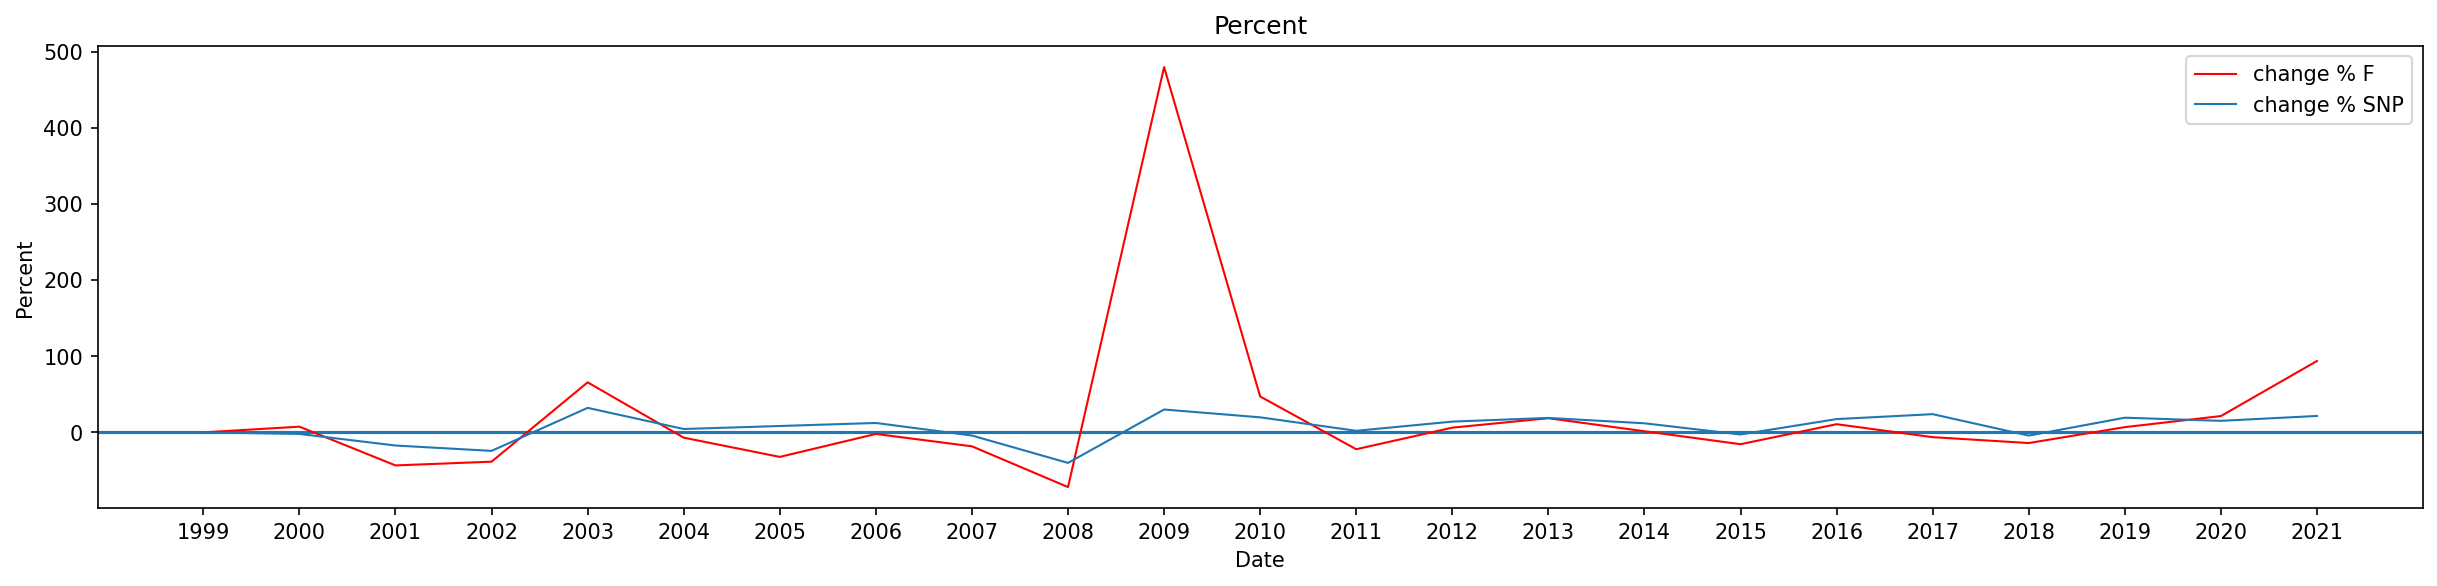

In [19]:
# plot size
figure(figsize=(20,4), dpi=150)

plt.axhline(y=0, linestyle='-')

# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


# Plot 
# plt.plot(df_with_changes_inc_stat[is0],lw=1, label=is0)
plt.plot(df_with_changes_inc_stat[is1],'r',lw=1, label=is1)
# plt.plot(df_with_changes_inc_stat[is2],'g',lw=1, label=is2)
plt.plot(df_with_changes_inc_stat[is3], lw=1, label=is3)

# Add a legend to the axis
plt.legend()

plt.show()

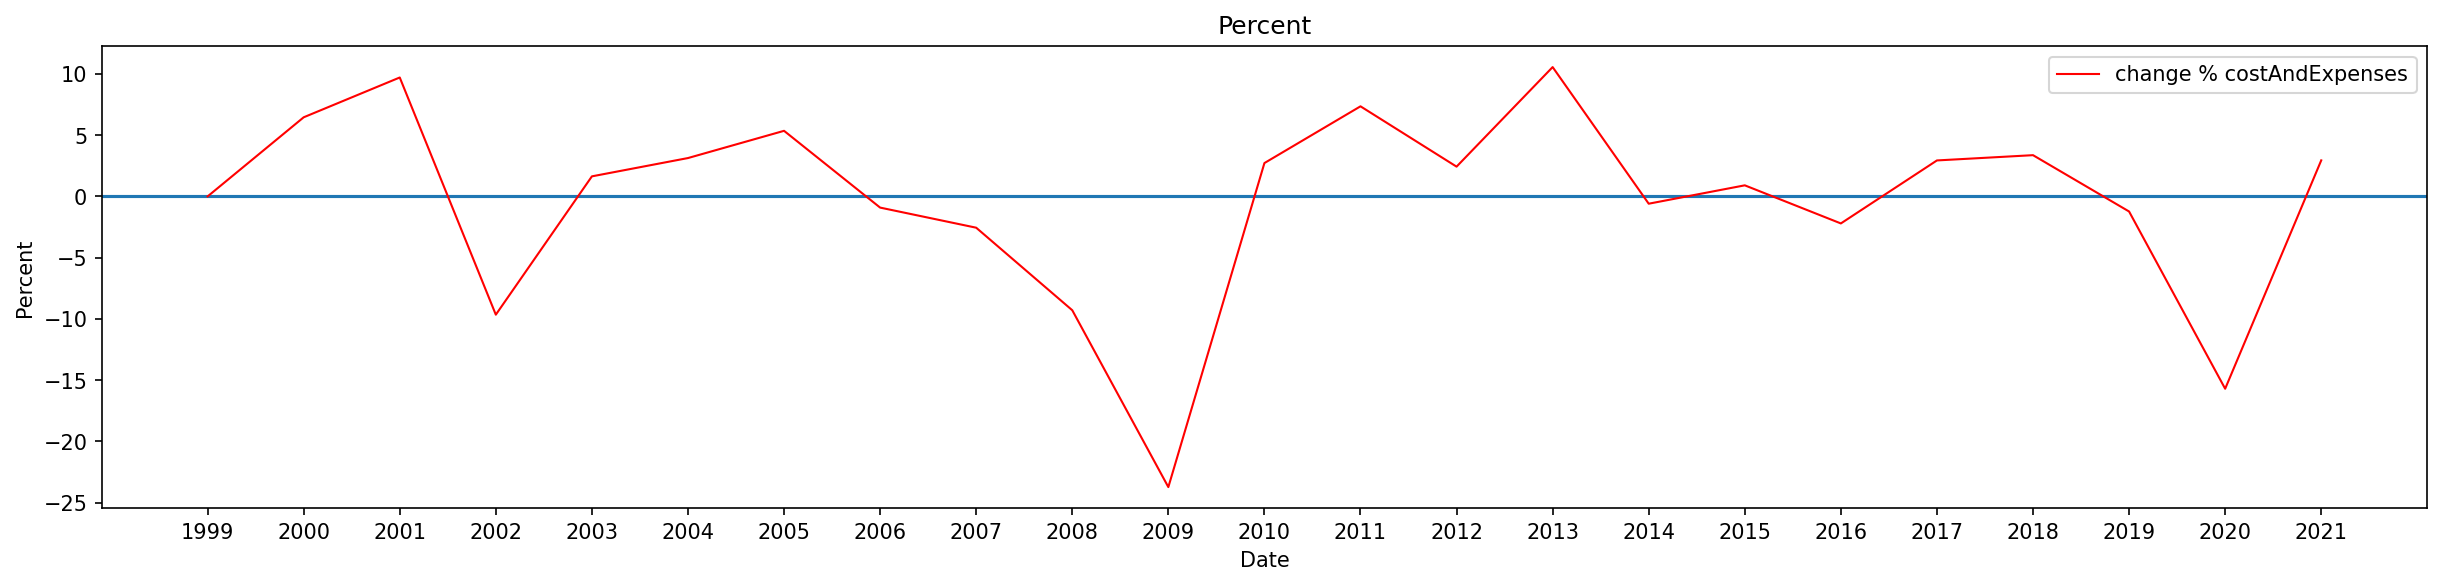

In [20]:
# plot size
figure(figsize=(20,4), dpi=150)

plt.axhline(y=0, linestyle='-')

# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')




# Plot 

# plt.plot(df_with_changes_inc_stat[is16],'r', lw=1, label=is16)
# plt.plot(df_with_changes_inc_stat[is38],'g', lw=1, label=is38)
plt.plot(df_with_changes_inc_stat[is39],'r', lw=1, label=is39)
# plt.plot(df_with_changes_inc_stat[is40],'b', lw=1, label=is40)
# plt.plot(df_with_changes_inc_stat[is41],'g', lw=1, label=is41)
# plt.plot(df_with_changes_inc_stat[is42],'y', lw=1, label=is42)
# Add a legend to the axis
plt.legend()

plt.show()